In [1]:
from scipy.optimize import linprog
import time
start = time.time()
c = [-25, -15]
A = [[2,1],[3,2],[4,2]]
b = [40, 65, 80]
x0_bounds = (0, None)
x1_bounds = (0, None)
res = linprog(c, A_ub = A, b_ub = b, bounds=[x0_bounds, x1_bounds])
print(res)
stop=time.time()
print("Time :")
print(stop - start)

     con: array([], dtype=float64)
     fun: -524.9999999951665
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([3.56550345e-10, 6.10128836e-10, 7.13100690e-10])
  status: 0
 success: True
       x: array([15., 10.])
Time :
0.4876985549926758


In [3]:
!pip install pulp
from pulp import *
import time
start = time.time()
x1 = pulp.LpVariable("x1", lowBound = 0)
x2 = pulp.LpVariable("x2", lowBound = 0)
prob = pulp.LpProblem('0', LpMaximize)
prob += 25 * x1 + 15 * x2
prob += 2 * x1 +  x2 <= 40
prob += 3 * x1 + 2 * x2 <= 65
prob += 4 * x1 + 2 * x2 <= 80
prob.solve()
print ("result: ")
for variable in problem.variables():
	print (variable.name, "=", variable.varValue)
print ("income :")
print (value(prob.objective))
stop = time.time()
print('Time: ')
print(stop - start)


result: 


NameError: name 'problem' is not defined

NameError: name 'value' is not defined

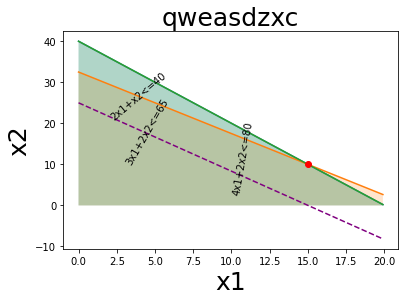

In [4]:
import numpy as np
import matplotlib.pyplot as plt
def F(a1, a2, b, x):
    return (b - a1 * x) / a2;

x = np.arange(0, 20, 0.1)
y1 = F(b = b[0], a1 = A[0][0], x=x, a2=A[0][1])
y2 = F(b = b[1], a1 = A[1][0], x=x, a2=A[1][1])
y3 = F(b = b[2], a1 = A[2][0], x=x, a2=A[2][1])


plt.plot(x,y1)
plt.fill_between(x, y1, alpha = 0.2)
plt.text(2, 21, '2x1+x2<=40', rotation = 40)
plt.plot(x, y2)
plt.fill_between(x, y2, alpha = 0.2)
plt.text(3, 10, '3x1+2x2<=65', rotation = 60)
plt.plot(x, y3)
plt.fill_between(x, y3, alpha = 0.2)
plt.text(10, 3, '4x1+2x2<=80', rotation = 80)

plt.plot(x,(c[0]*c[1]-np.abs(c[0])*x)/np.abs(c[1]),'--', color = 'purple')
plt.plot(res.x[0], res.x[1], "ro")

plt.title('qweasdzxc', fontsize = 25)
plt.xlabel('x1', fontsize = 25)
plt.ylabel('x2', fontsize = 25)
plt.savefig("paint.png", dpi = 600)
plt.show;


In [5]:
from scipy.optimize import linprog
import time
start = time.time()
c = [9,5,7,10,9,8,15,11,3,12,10,14,6,11,9,16,5,7,4,8,]
A_ub = [[1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
	 [0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0],
	 [0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0],
	 [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1]]
b_ub = [90,70,65,75]
A_eq = [[1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0],
	 [0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0],
	 [0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0],
	 [0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0],
	 [0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1]]
b_eq =[70,90,50,60,30]
a = linprog(c, A_ub, b_ub, A_eq, b_eq)
x=a.x.reshape((4,5))
print(x.round())
stop = time.time()
print("Time: ")
print(stop - start)

[[33. 57.  0.  0.  0.]
 [30.  0.  0. 40.  0.]
 [ 7.  0. 50.  0.  8.]
 [ 0. 33.  0. 20. 22.]]
Time: 
0.013958930969238281
